In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from e_commerce_base import get_binary_data

In [2]:
X, Y = get_binary_data()

In [4]:
print(X.shape, Y.shape)

(398, 8) (398,)


Split Training and testing set

In [10]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

In [6]:
D = X.shape[1]
W = np.random.randn(D)
b = 0

In [7]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def predict(X, W, b):
    return sigmoid(X.dot(W) + b)

def classification_rate(Y, P):
    return np.mean(Y == P)

In [8]:
def cross_entropy(T, pY):
    return -np.mean(T * np.log(pY) + (1 - T) * np.log(1 - pY))

In [9]:
train_costs = []
test_costs = []
learning_rate = 0.001

In [11]:
for i in range(10000):
    pYtrain = predict(Xtrain, W, b)
    pYtest = predict(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain, pYtrain)
    ctest = cross_entropy(Ytest, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate * Xtrain.T.dot(pYtrain - Ytrain)
    b -= learning_rate * (pYtrain - Ytrain).sum()
    
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate: ", classification_rate(Ytrain, np.round(pYtrain)))
print("Final test classification_rate: ", classification_rate(Ytest, np.round(pYtest)))

0 1.065682843536551 1.0928173258214473
1000 0.20413275119024052 0.1307343471747734
2000 0.20310338386956855 0.12604044114299462
3000 0.20305070776671907 0.12514180572330524
4000 0.20304737089801084 0.12492511537779645
5000 0.20304714912859212 0.12486986783898629
6000 0.2030471342112227 0.12485558009698758
7000 0.20304713320468784 0.12485187150336831
8000 0.20304713313671827 0.12485090796665432
9000 0.20304713313212788 0.12485065756651632
Final train classification_rate:  0.9697986577181208
Final test classification_rate:  0.98


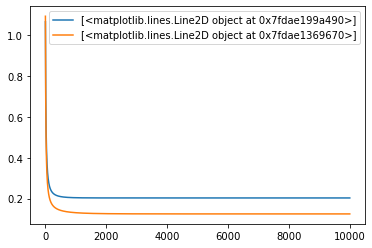

In [13]:
legend1 = plt.plot(train_costs, label='train_cost')
legend2 = plt.plot(test_costs, label='test_cost')
plt.legend([legend1, legend2])
plt.show()